In [8]:
#this is to learn and simulate 
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd


torch.manual_seed(42)
p = torch.tensor([10,8,6,4,2,1],dtype=torch.float)
p1=torch.diag(p)
n=6
tao=100
dt = 1e-3
T=int(10/dt)
B=10
w=torch.randn(n,n, device='cpu', requires_grad=True,dtype=torch.float)
lr = 1e-1
n_epochs = 1

optimizer = optim.Adam([w], lr=lr)
V=torch.zeros(T,n)
ep=np.arange(n_epochs)
Loss=torch.zeros(n_epochs,)
Wmean=torch.zeros(n_epochs,)


for epoch in range(n_epochs):
    #generate a panda dataframe consists the values and class E of the neuron, assign 1 to the data 
    ze = pd.DataFrame({'Value': torch.from_numpy(np.absolute(np.array(np.random.normal(0, 1, math.ceil(n/2))))),
                    'Type': 'E',
                    'sign': np.array([1] * math.ceil(n/2), dtype='int32')})  
     #generate a panda dataframe consists the values and class I of the neuron, assign -1 to the data 
    zi = pd.DataFrame({'Value': torch.from_numpy(-np.absolute(np.array(np.random.normal(0, 1, round(n/2))))),
                    'Type': 'I',
                    'sign': np.array([-1] * round(n/2), dtype='int32')})   
    #join E neurons and I neuronns 
    zf = pd.concat([ze, zi])
    #mix the joint population 
    zd = zf.sample(frac=1).reset_index(drop=True)
    #convert the panda dataframe to a tensor 
    z=torch.zeros(1,n)
    for d in range(n):
        z[:,d]=(zd.loc[d,'Value'])
        
    #print(z,w)
    #create a new tensor to prevent the leaf variable go into the learning process     
    wi=torch.randn(n,n)
    for i in range(n):
        for j in range(n):
            #print (z.loc[j,'sign'])
            #print (w[i,j])
            wi[i,j]=(zd.loc[j,'sign'])*w[i,j]
            #print (w[i,j])
    
    w1=torch.diag(wi)
    w_rec=torch.diag(w1)
    w1_rec = wi-w_rec
    #print (w1_rec)
   
    loss=0
    for t in range(T):
        N=torch.randn(1,n)
        z_dot=(-z+(z@w1_rec)/math.sqrt(n))
        z = z + z_dot*dt+N*math.sqrt(dt)
        loss = loss + ((z@p1)**2).mean()
    
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    Loss[epoch]=loss
    w_dia=torch.diag(w)
    w_mean=torch.mean(w_dia)
    Wmean[epoch]=w_mean
 













In [11]:
print (p,p1)
type(p1)

tensor([10.,  8.,  6.,  4.,  2.,  1.]) tensor([[10.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  8.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  6.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  4.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  2.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.]])


torch.Tensor

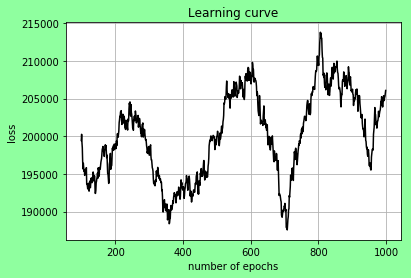

      Value Type  sign
0  1.108175    E     1
1  2.309231    E     1
2  0.981617    E     1       Value Type  sign
0 -0.845732    I    -1
1 -0.161375    I    -1
2 -0.082683    I    -1       Value Type  sign
0  1.108175    E     1
1  2.309231    E     1
2  0.981617    E     1
0 -0.845732    I    -1
1 -0.161375    I    -1
2 -0.082683    I    -1       Value Type  sign
0 -0.161375    I    -1
1 -0.845732    I    -1
2 -0.082683    I    -1
3  2.309231    E     1
4  1.108175    E     1
5  0.981617    E     1
      Value Type  sign
0  0.155614    E     1
1  0.371732    E     1
2  1.336565    E     1       Value Type  sign
0 -0.124235    I    -1
1 -0.369827    I    -1
2 -0.551935    I    -1       Value Type  sign
0  0.155614    E     1
1  0.371732    E     1
2  1.336565    E     1
0 -0.124235    I    -1
1 -0.369827    I    -1
2 -0.551935    I    -1       Value Type  sign
0 -0.551935    I    -1
1  0.155614    E     1
2  0.371732    E     1
3 -0.369827    I    -1
4  1.336565    E     1
5 -0.124235

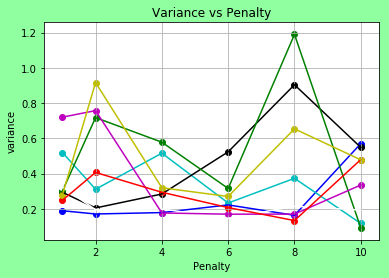

In [7]:

#this is to plot the graph 
fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.title('Learning curve')
df=pd.DataFrame(Loss.detach().numpy())
rolling_mean = df.rolling(window=100).mean()
plt.plot(ep, rolling_mean, label='Learning Curve', color='k')
plt.grid(True)
plt.show()



fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')
plt.ylabel('variance')
plt.xlabel('Penalty')
plt.title('Variance vs Penalty')
plt.grid(True)
color=['b','c','k','g','w','m','r','y']
for a in range(8):
    #generate a panda dataframe consists the values and class E of the neuron, assign 1 to the data 
    ze = pd.DataFrame({'Value': torch.from_numpy(np.absolute(np.array(np.random.normal(0, 1, math.ceil(n/2))))),
                    'Type': 'E',
                    'sign': np.array([1] * math.ceil(n/2), dtype='int32')})  
     #generate a panda dataframe consists the values and class I of the neuron, assign -1 to the data 
    zi = pd.DataFrame({'Value': torch.from_numpy(-np.absolute(np.array(np.random.normal(0, 1, round(n/2))))),
                    'Type': 'I',
                    'sign': np.array([-1] * round(n/2), dtype='int32')})   
    #join E neurons and I neuronns 
    zf = pd.concat([ze, zi])
    #mix the joint population 
    zd = zf.sample(frac=1).reset_index(drop=True)
    #convert the panda dataframe to a tensor 
    print (ze,zi,zf,zd)
    z=torch.zeros(1,n)
    for m in range(n):
        z[:,m]=(zd.loc[m,'Value'])
        
    #print (z)
        

    Z=torch.zeros(T,n)
   
    
    for t in range(T):
        N=torch.randn(1,n)
        z_dot=(-z+(z@w1_rec)/math.sqrt(n))
        z = z + z_dot*dt+N*math.sqrt(dt)
        Z[t] = z
        Z_split = torch.split(Z,int(T/2),dim=0)[1]
        
    V=torch.zeros(n,1)

    for i in range(n):
        V[i]=torch.var(Z_split[:,i])  
        
    plt.scatter(p,V.detach().numpy(),color=color[a])   
    plt.plot(p.detach().numpy(),V.detach().numpy(),color=color[a]) 
    
plt.show() 



